In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"C:\Users\omers\OneDrive\Masaüstü\MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240504.csv")



In [3]:
df['date'] = df['transit_timestamp'].str[:10]
df['time'] = df['transit_timestamp'].str[11:]


In [4]:
deleted_columns = ['transit_timestamp', 'transit_mode','payment_method','fare_class_category','latitude','longitude','Georeference','transfers','station_complex_id']
df.drop(deleted_columns, axis=1, inplace=True)

In [ ]:
df

In [5]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['month'] = df['date'].dt.month

In [6]:
march_june_data = df[df['month'].isin([3, 4, 5, 6])]
monthly_ridership = march_june_data.groupby('month')['ridership'].sum()



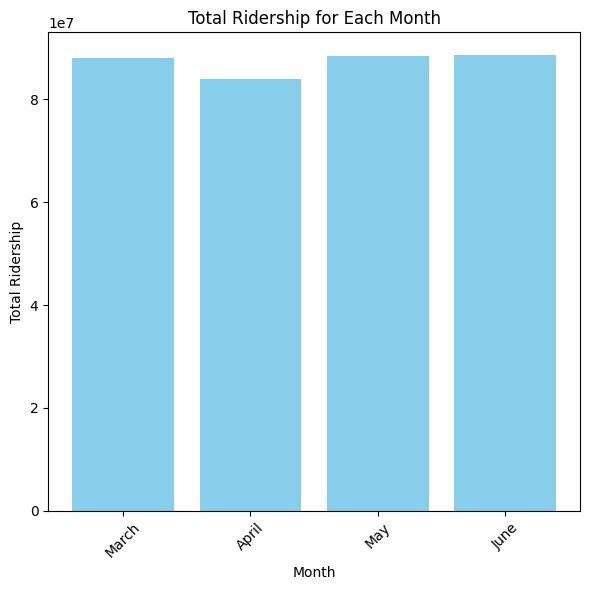

In [7]:
plt.figure(figsize=(6, 6))
months = ['March', 'April', 'May', 'June']
plt.bar(months, monthly_ridership, color='skyblue')
plt.title('Total Ridership for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Ridership')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [8]:
borough_ridership = df.groupby('borough')['ridership'].sum().sort_values(ascending=False)

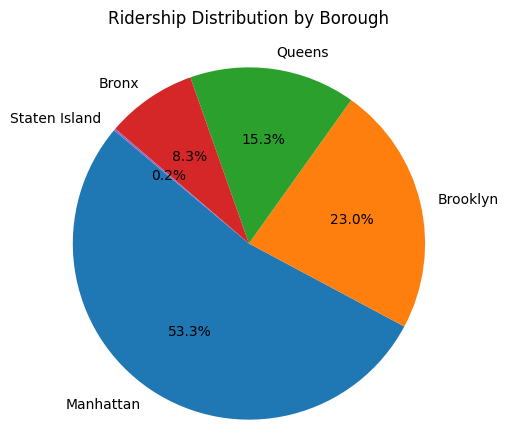

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(borough_ridership, labels=borough_ridership.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Ridership Distribution by Borough', pad=20)  # Adjust the position of the title
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

In [16]:
df['time'] = pd.to_datetime(df['time'])
df.info()


C:\Users\omers\AppData\Local\Temp\ipykernel_14508\671763805.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278867 entries, 0 to 8278866
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   station_complex  object        
 1   borough          object        
 2   ridership        int64         
 3   date             datetime64[ns]
 4   time             datetime64[ns]
 5   month            int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 347.4+ MB


In [17]:
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
pivot_table = df.pivot_table(index='hour', columns='day_of_week', values='ridership', aggfunc='mean')
pivot_table = pivot_table[[0, 1, 2, 3, 4, 5, 6]]

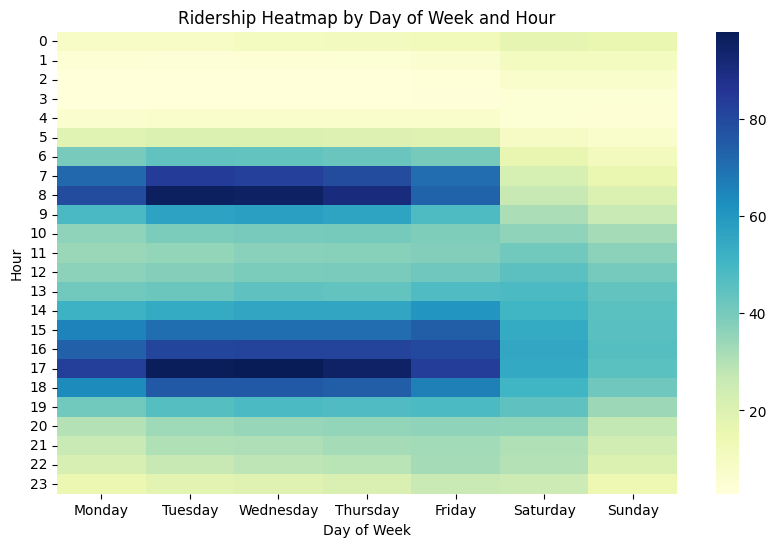

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Ridership Heatmap by Day of Week and Hour')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.yticks(rotation=0)

plt.savefig('heatmap.png')
plt.show()

In [39]:
manhattan_df = df[df['borough'] == 'Manhattan']
station_ridership_total = manhattan_df.groupby('station_complex')['ridership'].sum()



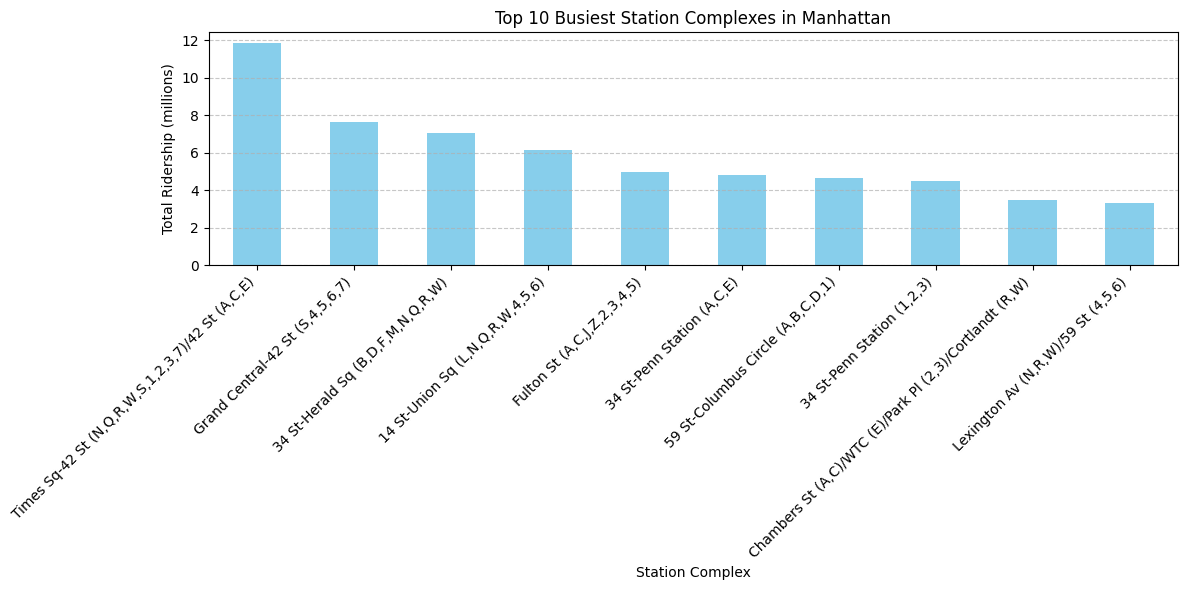

In [45]:
plt.figure(figsize=(12, 6))
(station_ridership_total.nlargest(10)/1000000).plot(kind='bar', color='skyblue')
plt.title('Top 10 Busiest Station Complexes in Manhattan')
plt.xlabel('Station Complex')
plt.ylabel('Total Ridership (millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('manhattancomplx.png')
plt.show()

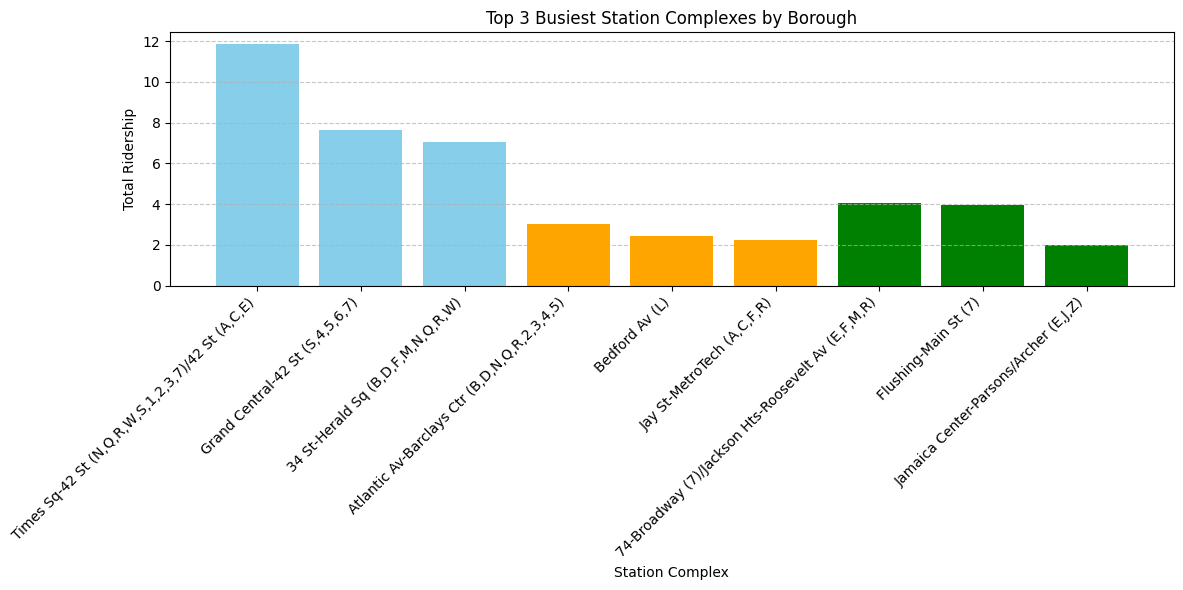

In [50]:
station_ridership_total = df.groupby(['borough', 'station_complex'])['ridership'].sum().reset_index()

# Get the top 3 busiest station complexes for each borough
top_3_stations_manhattan = station_ridership_total[station_ridership_total['borough'] == 'Manhattan'].nlargest(3, 'ridership')
top_3_stations_brooklyn = station_ridership_total[station_ridership_total['borough'] == 'Brooklyn'].nlargest(3, 'ridership')
top_3_stations_queens = station_ridership_total[station_ridership_total['borough'] == 'Queens'].nlargest(3, 'ridership')

# Combine the top stations from all boroughs
top_stations_all = pd.concat([top_3_stations_manhattan, top_3_stations_brooklyn, top_3_stations_queens])

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_stations_all['station_complex'], top_stations_all['ridership']/1000000, color=top_stations_all['borough'].map({'Manhattan': 'skyblue', 'Brooklyn': 'orange', 'Queens': 'green'}))
plt.title('Top 3 Busiest Station Complexes by Borough')
plt.xlabel('Station Complex')
plt.ylabel('Total Ridership')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('mostbusycomplexes.png')
plt.show()